## Parameters of interest
$S_n$ values in the region that satisfy all the conditions:
1. On the neutron-rich side of the valley of stability.
2. AME evaluation values are <i>not</i> available.
3. FRDM calculation is available.
4. $150 \leq A \leq 179$ and $95\leq N \leq 114.$

The resulting number of parameters are <b>354</b>.

[2274]
[9189]


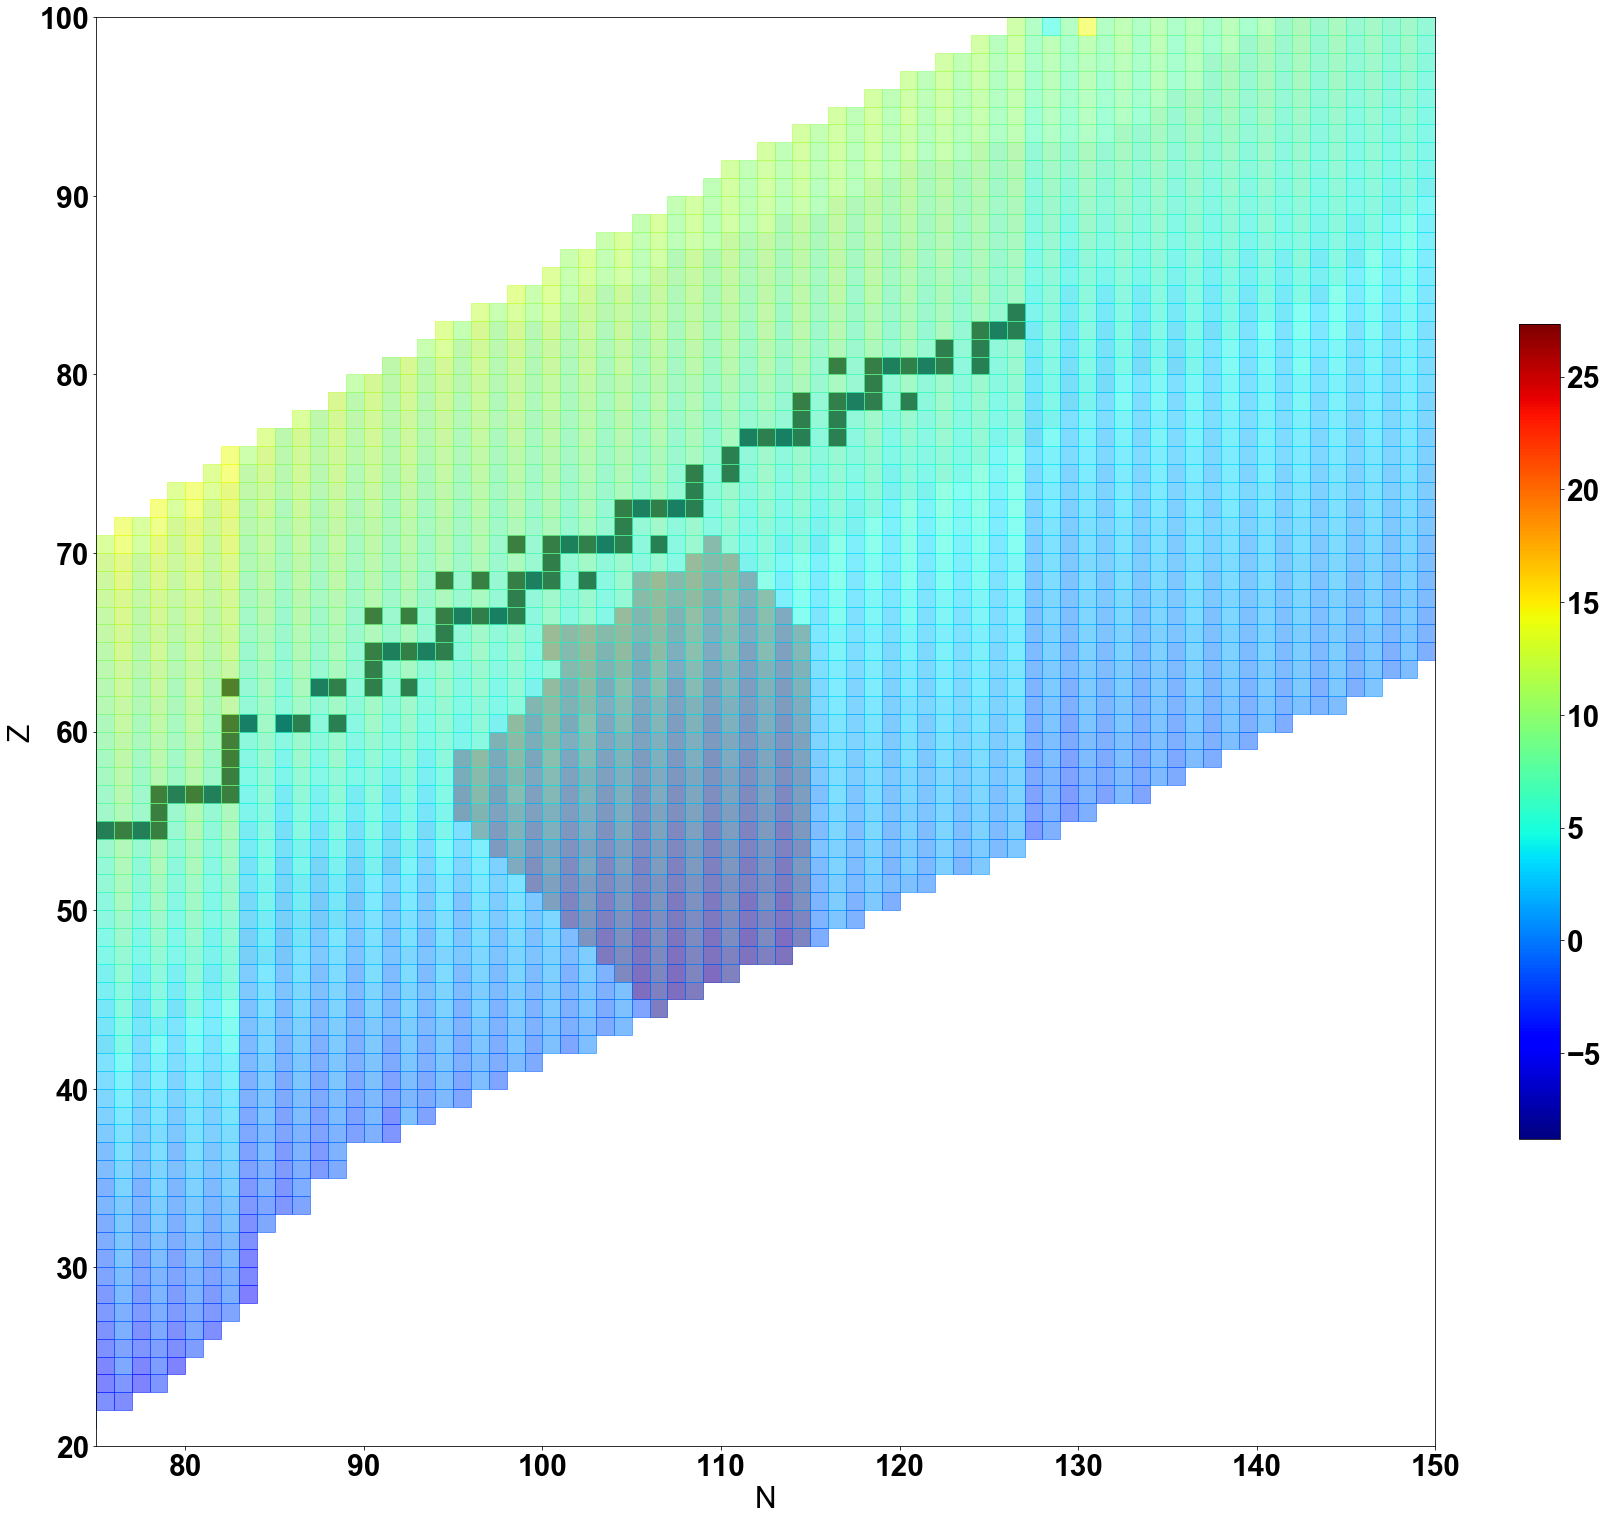

In [71]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle
from mpl_toolkits.axes_grid1 import make_axes_locatable
import pandas as pd
mpl.rcParams.update({'font.size': 30}) 

f = open('../../LosAlamos/PRISM-1.2.0/prism-1.2/input/data/s1n_ame2012.bin', 'rb')
#f = open('test.bin', 'rb')

f.seek(4)
recl = np.fromfile(f, dtype=np.dtype('i4'), count=1)
print(recl)

data_ame = np.zeros((2274,3))
dict_ame = {}

for i in range(2274):
    f.seek(16+72*i)
    rZ = np.fromfile(f, dtype=np.dtype('i4'), count=1)

    f.seek(28+72*i)
    rN = np.fromfile(f, dtype=np.dtype('i4'), count=1)

    f.seek(40+72*i)
    pZ = np.fromfile(f, dtype=np.dtype('i4'), count=1)

    f.seek(56+72*i)
    pN = np.fromfile(f, dtype=np.dtype('i4'), count=1)

    f.seek(72+72*i)
    s1n = np.fromfile(f, dtype=np.dtype('f8'), count=1)

    data_ame[i] = (rZ[0],rN[0],s1n[0])
    dict_ame[(rZ[0],rN[0])] = s1n[0]
    
f.close()


f = open('../../LosAlamos/PRISM-1.2.0/prism-1.2/input/data/s1n_frdm2012.bin', 'rb')
#f = open('test.bin', 'rb')

f.seek(4)
recl = np.fromfile(f, dtype=np.dtype('i4'), count=1)
print(recl)

data_frdm = np.zeros((9189,3))
dict_frdm = {}

for i in range(9189):
    f.seek(16+72*i)
    rZ = np.fromfile(f, dtype=np.dtype('i4'), count=1)

    f.seek(28+72*i)
    rN = np.fromfile(f, dtype=np.dtype('i4'), count=1)

    f.seek(40+72*i)
    pZ = np.fromfile(f, dtype=np.dtype('i4'), count=1)

    f.seek(56+72*i)
    pN = np.fromfile(f, dtype=np.dtype('i4'), count=1)

    f.seek(72+72*i)
    s1n = np.fromfile(f, dtype=np.dtype('f8'), count=1)

    data_frdm[i] = (rZ[0],rN[0],s1n[0])
    dict_frdm[(rZ[0],rN[0])] = s1n[0]
f.close()

df_grid = pd.read_csv("nuclear_wallet_card.dat",sep='\t')
grid_Z = df_grid.iloc[:,2].values
grid_N = df_grid.iloc[:,3].values
grid_T12 = df_grid.iloc[:,8].str.replace(r"[\"\',]", '')
grid_T12 = grid_T12.str.rstrip()
grid_T12 = grid_T12.values

grid = []
for z,n in zip(grid_Z,grid_N):
    grid.append([n,z])

grid_stable = []
dict_stable = {}
for i in range(len(grid_T12)):
    if grid_T12[i]=='STABLE':
        grid_stable.append([grid_N[i],grid_Z[i]])
        dict_stable[grid_Z[i]]=grid_N[i]
        
grid = np.unique(grid, axis=0)


fig, ax = plt.subplots(1,figsize=(30,30))
ax = plt.gca()

for i in range(len(grid)):
    rect=Rectangle(grid[i],1,1,alpha=0.1,color='grey',edgecolor=None,clip_on=True,linewidth=None)
    ax.add_patch(rect)
    
for i in range(len(grid_stable)):
    rect_stable=Rectangle(grid_stable[i],1,1,color='black',edgecolor=None,clip_on=True,linewidth=None)
    ax.add_patch(rect_stable) 

for A in range(150,180,1):
    for N in range(95,115,1):
        Z = A - N
        pos = [N,Z]
        if ((N<=94) or (N>=95 and N<= 98 and Z < 66) or (N>=99 and N<= 100 and Z < 68) or (N>=101 and N<= 104 and Z < 70) or (N>=105 and N<=108 and Z < 72) or (N>108)) and (dict_frdm.get((Z,N)) != None) and (dict_ame.get((Z,N)) == None):
            rect_var=Rectangle(pos,1,1,alpha=0.5,color='red',edgecolor=None,clip_on=True,linewidth=None)
            ax.add_patch(rect_var)  

normal = plt.Normalize(data_frdm.T[2].min(), data_frdm.T[2].max())
colors = plt.cm.jet(normal(data_frdm.T[2]))    
colors = colors.reshape(9189,4)

for x,y,c in zip(data_frdm.T[1],data_frdm.T[0],colors):
    rect = plt.Rectangle((x,y),1,1,alpha=0.5,edgecolor=None,color=c)
    ax.add_patch(rect)  

plt.xlim((75,150))
plt.ylim((20,100))
plt.xlabel('N')
plt.ylabel('Z')
ax.set_aspect(aspect=1)
cax, _ = mpl.colorbar.make_axes(ax,shrink=0.5) 
cb2 = mpl.colorbar.ColorbarBase(cax, cmap=plt.cm.jet,norm=normal)       

plt.show()

## Read Data
In this test run, I use 5000 data set.
I have 2000 more examples available, but since they are used as <b>test set</b>, <br>
<b>They can never be looked at</b> until we are ready to evaluate the performance of final models.



In [43]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.pyplot import figure

data_num = 10000
df = pd.read_csv("/Users/yukiya/Documents/Physics/PhD/work/test/training_data/all/abA0",delim_whitespace=True, header=None)
#index = df.index[df[0]==210]
#df.index.drop(index[0])
df = df[df[0]!=210]
length = len(df[0])
abA = np.zeros([length,2,data_num])
#print(abA[:,:,0].shape)
for i in range(data_num):
    df = pd.read_csv("/Users/yukiya/Documents/Physics/PhD/work/test/training_data/all/abA%s"%i,delim_whitespace=True, header=None)
    df = df[df[0]!=210]
    abA[:,:,i] = df.values
    #df.drop(df.index[df[0]==210])
    #print(abA.shape)

df_solar = pd.read_csv("/Users/yukiya/Documents/Physics/PhD/work/test/scaled-data",delim_whitespace=True, header=None)
abA_solar = df_solar.values

abA_short = abA[145:175,:,:]    
abA_short_data = abA_short[:,1,:]
abA_short_label = abA_short[:,0,:]
#A, abA = np.loadtxt("/Users/yukiya/Documents/Physics/PhD/work/test/training_data/0000_0999/abA0", usecols=(1, 2))
#df = pd.read_csv("/Users/yukiya/Documents/Physics/PhD/work/test/training_data/0000_0999/abA0",delim_whitespace=True, header=None)
#abA = df.values
#abA
#with pd.option_context('display.max_rows', None, 'display.max_columns', None): display(df)

In [56]:
for i in range(30):
    print(np.argwhere(abA_short_label[i,:]!=150+i))

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]


### A quick look at the simulation results

<function matplotlib.pyplot.show(*args, **kw)>

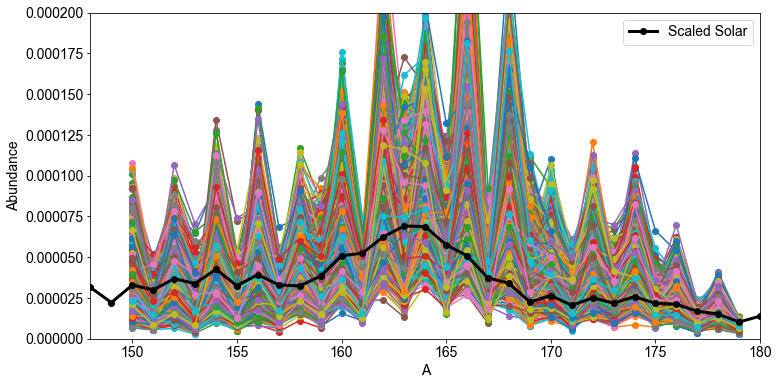

In [57]:
fig=plt.figure(figsize=(12, 6))
plt.rcParams.update({'font.size': 14})
for i in range(7000, 10000):
    plt.plot(abA_short_label[:,i], abA_short_data[:,i], '-o')
legend_solar, = plt.plot(abA_solar[:,0], abA_solar[:,1]/4, '-o', lw=3, c='black', label='Solar')
plt.legend([legend_solar],['Scaled Solar'])
plt.xlim(148,180)
plt.ylim(0,0.0002)
plt.xlabel('A')
plt.ylabel('Abundance')
plt.show

## Recreate the original input for PRISM
The training data were produced by varying the original FRDM $S_n$ values by $\pm$0.25 MeV.<br>
Here, I change the variation size to 0 - 1 MeV for numerical stability.<br>
The results can be translated into $\pm$0.25 MeV variation by deviding the $S_n$ by 2.<br>
The seed for the random values are set to 100, so we can recreate the randomized input.

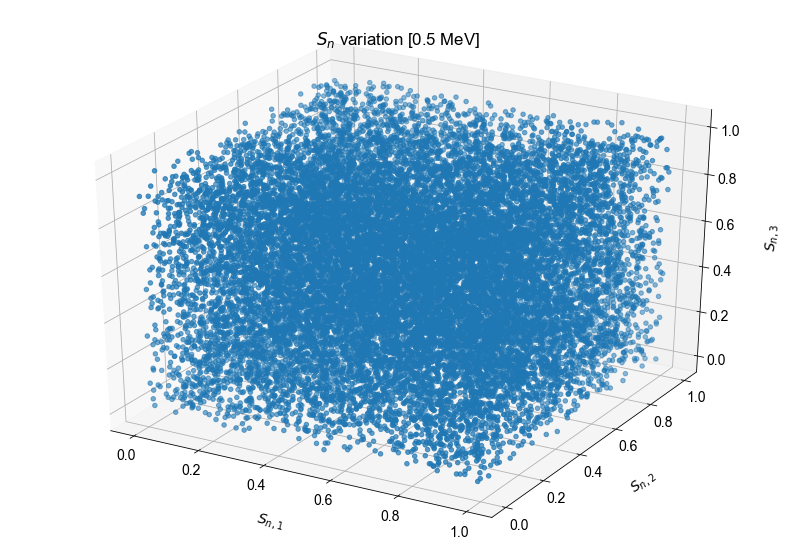

In [81]:
from pyDOE import *
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
np.random.seed(100)

data_frdm_var = np.zeros(354)
lhd = lhs(len(data_frdm_var), samples=20000, criterion='center')
var_size = 1 #MeV
for i in range(len(data_frdm_var)):
    #lhd[:,i] = (lhd[:,i]*var_size-var_size/2)#Simulation ran with 0.5MeV variation
    lhd[:,i] = (lhd[:,i]*var_size)#Simulation ran with 0.5MeV variation. Here the variation is normalized from 0 to 1
#lhd[:,0]

plt.rcParams.update({'font.size': 14})
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')


ax.scatter(lhd[:,1], lhd[:,2], lhd[:,3], marker='o')

ax.set_title('$S_n$ variation [0.5 MeV]')
ax.set_xlabel('$S_{n,1}$')
ax.set_ylabel('$S_{n,2}$')
ax.set_zlabel('$S_{n,3}$')
ax.xaxis.labelpad = 20
ax.yaxis.labelpad = 20
ax.zaxis.labelpad = 20

## Training 
###  - Data scaling
The original abundance in the Lanthanide region is in the order of $10^{-5}$, and this results in poor numerical stability (the neural network returns 0 everywhere and the apparent accuracy would still be high).
Therefore, multiply the abundance by $10^6$

In [82]:
print(abA_short_data[:,0]*10**6)
print(lhd[:,0])

[ 26.77384679  17.93541757  49.93900523  27.36710764  54.25956763
  21.12283242  40.32805372  20.25081342  58.31366021  78.9599948
 107.95236222  37.78590869  52.25751944  28.36490253  75.01875509
  39.10740747  73.11536415  31.21384105 166.13797973  65.84048026
  52.84981918  23.2138395   26.2490215   19.49945854  46.44325072
  18.61158198  24.98122429  12.68645722  16.27731944   7.5287482 ]
[0.044225 0.021425 0.646275 ... 0.881775 0.942075 0.591025]


### - Neural Network Architecture
#### Feedforward Neural Network, as known as multi-layer percentron
The input is a vector of 354 $S_n$ values.<br>
First Layer: 256 Nodes <br>
(Hidden) Second Layer: 128 Nodes<br>
(Hidden) Third Layer: 64 Nodes<br>
(Hidden) Fourth Layer: 32 Nodes<br>
Final Layer: 30 Nodes (Which is the size of output)<br>
<br>
The architecture is more or less arbitary, but this seems to work reasonably well.<br>
In the final layer, the bias term is initialized by a uniform fistribution between 10 and 100 (educated guess).
<img src="mlp.png" width="70%"><br>

#### Activation Unit
Standard choice: ReLU (Rectified Linear Unit). This fixes the "vanishing gradient" problem with the sigmoid function.
<img src="activation.png">

In [121]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.initializers import Constant, RandomNormal, RandomUniform
from keras import optimizers

model = Sequential()
model.add(Dense(256, input_shape=(354,), activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.33))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.33))
#model.add(Dense(64, activation='relu'))
#model.add(Dropout(0.33))
#model.add(Dense(32, activation='relu'))
model.add(Dense(30, activation='relu')) #The output activation may be better with ReLu

adam = optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(optimizer=adam,
             loss='mse')
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_65 (Dense)             (None, 256)               90880     
_________________________________________________________________
dense_66 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_17 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_67 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_18 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_68 (Dense)             (None, 30)                1950      
Total params: 133,982
Trainable params: 133,982
Non-trainable params: 0
_______________________________________________

### - Training
$200 \text{ epoch}$: Two hundred forward pass and backward pass of all the training examples. <br>
$\text{Batch size} = 32$: Thirty-two training examples in one forward/backward pass. <br>
$\text{Number of iterations in one epoc}$: $5000/32 \sim 157$ iterations.<br>
<br>
$25\% = 1250 \text{ examples}$ out of $5000 \text{ examples}$ are used for validation (not used for training) 

In [122]:
X = lhd[0:10000,:]
Y = np.transpose(abA_short_data)*10**5 #How to normalize the target has to be considered

history = model.fit(X, Y, epochs=300, batch_size=100, validation_split=0.25, verbose=1)

Train on 7500 samples, validate on 2500 samples
Epoch 1/300
7500/7500 [==============================] - 1s 152us/step - loss: 9.6385 - val_loss: 3.6841
Epoch 2/300
7500/7500 [==============================] - 1s 71us/step - loss: 5.1693 - val_loss: 3.4058
Epoch 3/300
7500/7500 [==============================] - 1s 75us/step - loss: 4.5543 - val_loss: 3.3138
Epoch 4/300
7500/7500 [==============================] - 1s 69us/step - loss: 4.2286 - val_loss: 3.2359
Epoch 5/300
7500/7500 [==============================] - 1s 71us/step - loss: 4.0457 - val_loss: 3.2104
Epoch 6/300
7500/7500 [==============================] - 1s 77us/step - loss: 3.9159 - val_loss: 3.0703
Epoch 7/300
7500/7500 [==============================] - 1s 73us/step - loss: 3.6842 - val_loss: 2.8516
Epoch 8/300
7500/7500 [==============================] - 1s 71us/step - loss: 3.4495 - val_loss: 2.8734
Epoch 9/300
7500/7500 [==============================] - 1s 72us/step - loss: 3.3059 - val_loss: 2.5607
Epoch 10/300
75

7500/7500 [==============================] - 0s 63us/step - loss: 1.6351 - val_loss: 1.3190
Epoch 79/300
7500/7500 [==============================] - 0s 56us/step - loss: 1.6137 - val_loss: 1.3118
Epoch 80/300
7500/7500 [==============================] - 0s 57us/step - loss: 1.6203 - val_loss: 1.4065
Epoch 81/300
7500/7500 [==============================] - 1s 68us/step - loss: 1.6210 - val_loss: 1.3568
Epoch 82/300
7500/7500 [==============================] - 0s 61us/step - loss: 1.6021 - val_loss: 1.3451
Epoch 83/300
7500/7500 [==============================] - 0s 59us/step - loss: 1.6203 - val_loss: 1.3073
Epoch 84/300
7500/7500 [==============================] - 0s 59us/step - loss: 1.5948 - val_loss: 1.3238
Epoch 85/300
7500/7500 [==============================] - 0s 57us/step - loss: 1.5928 - val_loss: 1.3325
Epoch 86/300
7500/7500 [==============================] - 0s 54us/step - loss: 1.6105 - val_loss: 1.2926
Epoch 87/300
7500/7500 [==============================] - 0s 55us/st

7500/7500 [==============================] - 0s 56us/step - loss: 1.3799 - val_loss: 1.2793
Epoch 156/300
7500/7500 [==============================] - 0s 55us/step - loss: 1.3602 - val_loss: 1.2451
Epoch 157/300
7500/7500 [==============================] - 0s 58us/step - loss: 1.3754 - val_loss: 1.2624
Epoch 158/300
7500/7500 [==============================] - 0s 59us/step - loss: 1.3542 - val_loss: 1.2607
Epoch 159/300
7500/7500 [==============================] - 0s 60us/step - loss: 1.3582 - val_loss: 1.2675
Epoch 160/300
7500/7500 [==============================] - 0s 55us/step - loss: 1.3559 - val_loss: 1.2835
Epoch 161/300
7500/7500 [==============================] - 0s 61us/step - loss: 1.3578 - val_loss: 1.2329
Epoch 162/300
7500/7500 [==============================] - 0s 59us/step - loss: 1.3682 - val_loss: 1.2592
Epoch 163/300
7500/7500 [==============================] - 0s 61us/step - loss: 1.3641 - val_loss: 1.2907
Epoch 164/300
7500/7500 [==============================] - 0

7500/7500 [==============================] - 1s 120us/step - loss: 1.2214 - val_loss: 1.1811
Epoch 233/300
7500/7500 [==============================] - 1s 124us/step - loss: 1.2263 - val_loss: 1.2025
Epoch 234/300
7500/7500 [==============================] - 1s 101us/step - loss: 1.2372 - val_loss: 1.1758
Epoch 235/300
7500/7500 [==============================] - 1s 74us/step - loss: 1.2265 - val_loss: 1.1903
Epoch 236/300
7500/7500 [==============================] - 1s 108us/step - loss: 1.2215 - val_loss: 1.1905
Epoch 237/300
7500/7500 [==============================] - 1s 103us/step - loss: 1.2125 - val_loss: 1.2088
Epoch 238/300
7500/7500 [==============================] - 1s 91us/step - loss: 1.2064 - val_loss: 1.1833
Epoch 239/300
7500/7500 [==============================] - 1s 96us/step - loss: 1.2169 - val_loss: 1.1892
Epoch 240/300
7500/7500 [==============================] - 1s 88us/step - loss: 1.2192 - val_loss: 1.1611
Epoch 241/300
7500/7500 [==============================

### - Losses
The plot below shows mean squared error (MSE).<br>
Training error and validation error (which approxemates generalization error) should not be far apart.

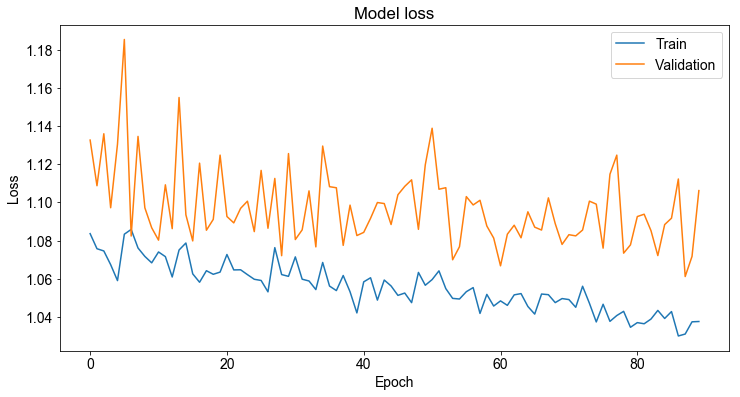

In [115]:
# Plot training & validation loss values
plt.rcParams.update({'font.size': 14})
fig=plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'][10:])
plt.plot(history.history['val_loss'][10:])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

### - Evaluation time
The neural network can return the prediction in a few milliseconds.

start
0.002964019775390625


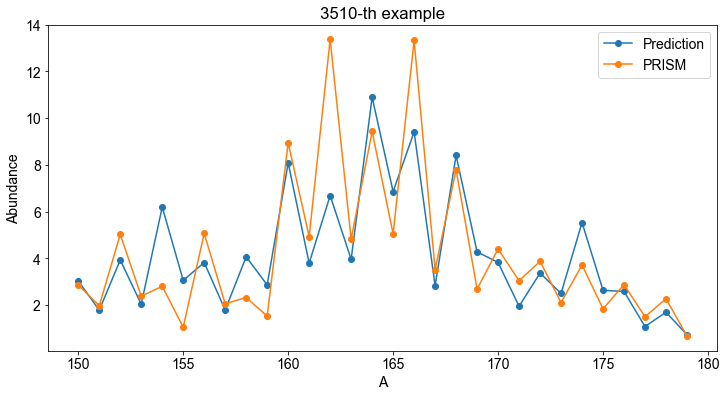

In [120]:
import time

example_num = 3510
test = X[example_num].reshape(1,-1)
start = time.time()
print("start")
testres = np.transpose(model.predict(test))
end = time.time()
print(end - start)
testres.reshape(1,-1)

plt.rcParams.update({'font.size': 14})
fig=plt.figure(figsize=(12, 6))
plt.plot(abA_short_label[:,0], testres, '-o')
plt.plot(abA_short_label[:,0], abA_short_data[:,390]*10**5, '-o')
plt.title('%s-th example'%example_num)
plt.ylabel('Abundance')
plt.xlabel('A')
plt.legend(['Prediction', 'PRISM'], loc='upper right')

## Next Step
### - Quantify modeling uncertainty
The prediction with neural network is not 100% accurate, and there are methods to quantify such prediction uncertainties.<br>
1. __Deep Ensemble__<br>
Essentialy train the same neural network with random initializations. I will have to manually define the type of the layer, but less effort than other methods. <br>
Reference: "Simple and Scalable Predictive Uncertainty Estimation using Deep Ensembles", arXiv:1612.01474 (2017)<br><br>
1. Bayesian Neural Network
1. Gaussian Process
<br>

### - Optimization
#### Chi squared-loss
Define the likelihood as 
$$P(D\mid \theta) = \exp(-\chi^2 (\theta)/2),$$
with the squared errors,
$$\chi^2(\theta) \equiv \sum_{n=1}^{N_D}\left( \frac{Y_{n}^{\mathrm{solar}}-Y_n^{\mathrm{pred}}(\theta)}{\Delta Y }\right)^2.$$
Where $D$ is the data for solar abundance, and $\theta$ is a set of $S_n$ values, which are the parameters to be optimized. 
 

From Bayes' theorem
$$P(\theta \mid D)  = \frac{P(D \mid \theta)P(\theta)}{P(D)}\propto P(D \mid \theta)P(\theta)$$.
In my case, $P(\theta)$ is a set of $S_n$ values which are FRDM $\pm$ 0.5 MeV

#### Markov chain Monte Carlo (MCMC) Methods
1. Metropolis(-Hastings) Algorithm<br>
Draw a sample from a proposal distribution, then accept the point with the probability determined by the posterior distribution. <br>
When the proposal distribution is reversible (eg. Gaussian), this becomes (Random walk) Metropolis algorithm.

<img src="metropolis.png">


2. Gibbs Sampling<br>
Fix all but one parameters and draw a sample of the one paramter from a conditional posterior distribution.

<img src="gibbs.png">

3. <b>Metropolis-within-Gibbs Sampling</b><br>
When direct sampling from the conditional posterior distribution is difficult in Gibbs sampling, draw a sample using Metropolis algorithm for each step.<br><br>

4. Hamiltonian Monte-Carlo (HMC)<br>
Introbuce so-called momentum $v$, then define Hamiltonian $H$ such that
$$\frac{dx_t}{dt} = \frac{\partial H}{\partial v}(x_t, v_t), \quad \frac{dv_t}{dt} = -\frac{\partial H}{\partial x}(x_t, v_t).$$
And the steps are determined by
$$v_{t+\epsilon/2} = v_t + \epsilon \nabla p(x_t)/2,$$
$$x_{t+\epsilon} = x_t + \epsilon M^{-1}v_{t+\epsilon/2},$$
$$v_{t+\epsilon} = v_{t+\epsilon/2} + \epsilon \nabla p(x_t)/2.$$
Where $p(x)$ is the target distribution (the posterior distribution $p(\theta \mid D)$ we want to sample from), and $M^{-1}$ is specified by
$$\frac{dx_t}{dt} = M^{-1} v_t.$$
<b>Empirical Properties:</b>
    * High acceptance rate (less random walk), compared to Metropolis algorithm.
    * Need calibration, but practical algorithms are available.
